## Importing All The Essential Libraries

In [2]:
import pandas as pd 
import numpy as np 
import time 
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn import datasets 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.tree._tree import TREE_LEAF
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.metrics import classification_report
from itertools import cycle
from scipy import interp

In [3]:
from matplotlib import pyplot as plt 
import seaborn as sns 
import pydotplus
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Importing the Data sets

In [5]:
data_1= pd.read_csv("data_1.csv")
data_2= pd.read_csv("data_2.csv")

## Pre-Processing the Data Sets

In [6]:
data_1.isnull().any().sum()
data_2.isnull().any().sum()

0

In [7]:
data_1.duplicated().sum() 
data_1.drop_duplicates(inplace=True)

data_2.duplicated().sum() 
data_2.drop_duplicates(inplace=True)

## Splitting the Data Set 1 

In [8]:
#https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

feature_cols =['baseline value', 'accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']

X=data_1[feature_cols]
y=data_1['fetal_health']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, stratify=y)

## Question 2

### Node Removal

#### Classifying the dataset using Decision Tree classifier

In [9]:
clf = DecisionTreeClassifier(random_state=1)
fig=clf.fit(X_train, y_train)
predicted= clf.predict(X_test)

#### Removing a node from the tree DT-A

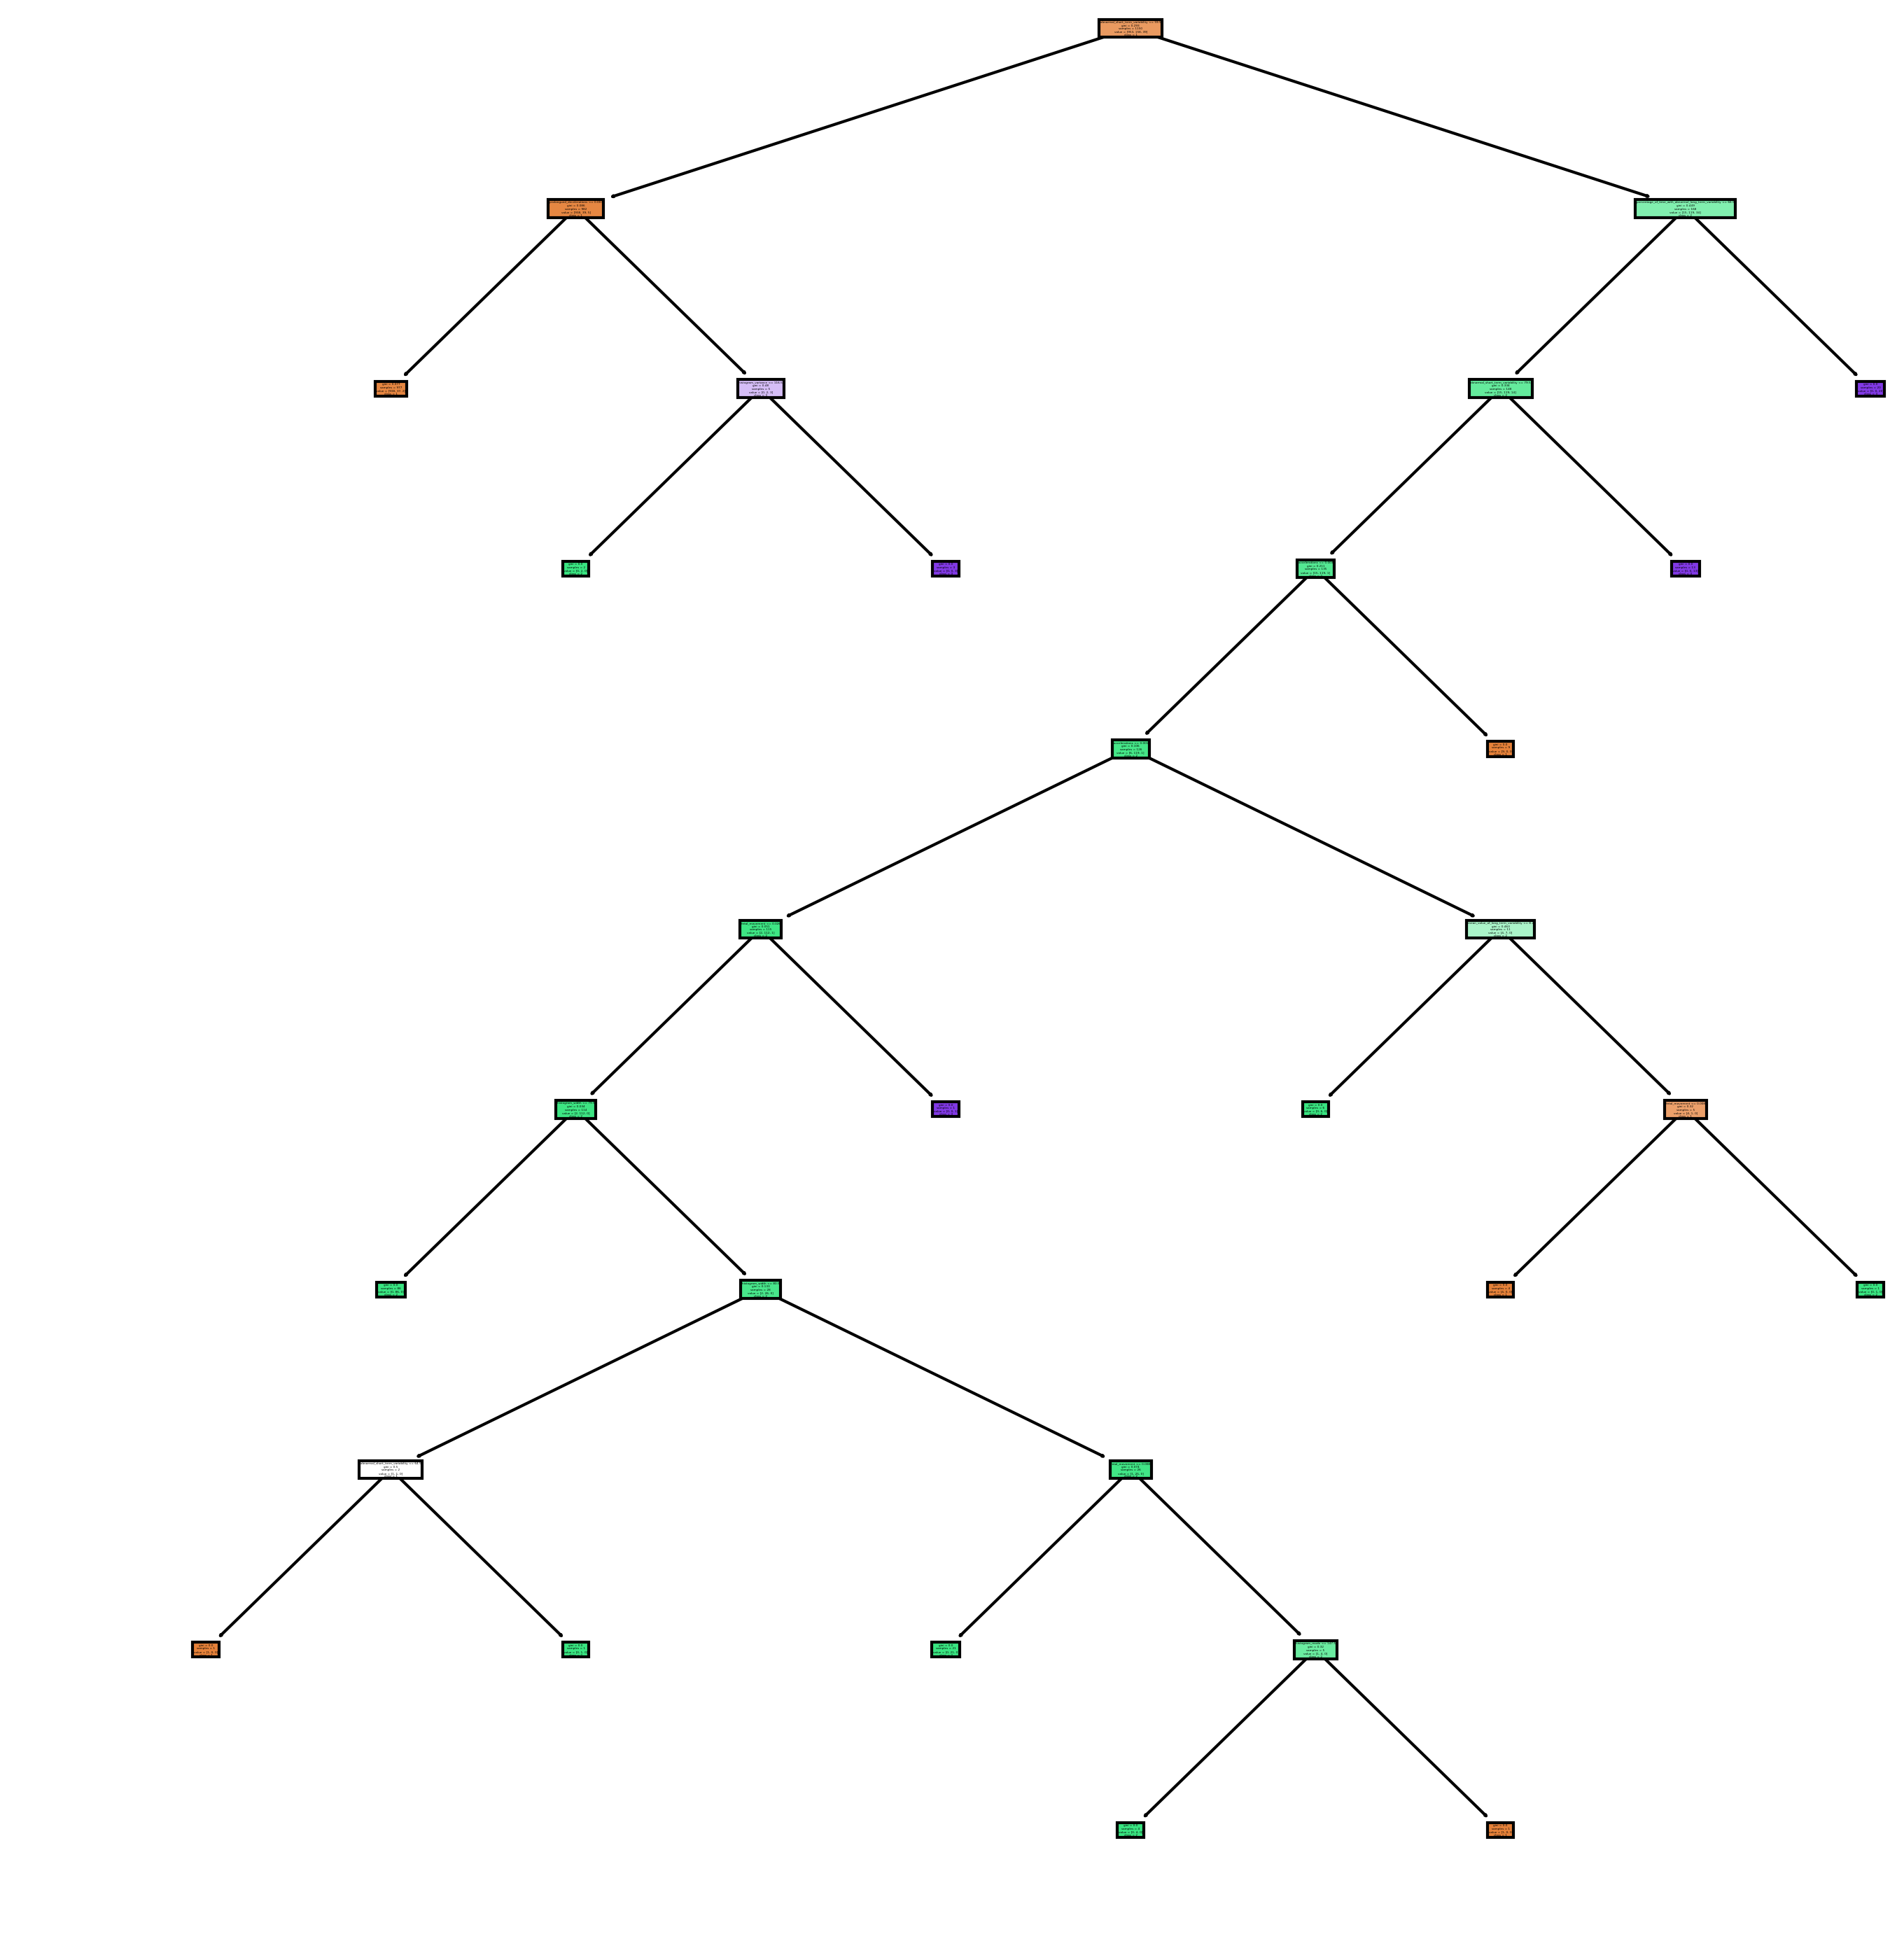

In [10]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
# tree.plot_tree(clf,feature_names = X.columns,class_names=np.unique(y).astype('str'),filled = True)
# fig.savefig('DT_B_1.png')
#plt.show()

clf.tree_.children_left[2] = TREE_LEAF
#tree.plot_tree(fig)

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,feature_names = X.columns,class_names=np.unique(y).astype('str'),filled = True)
fig.savefig('DT_B_1.png')
plt.show()

import pickle

dbfile = open('DT_B_1', 'ab')
      
    # source, destination
pickle.dump(clf, dbfile)                     
dbfile.close()

#### Accuracy Of The Above Tree

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9479166666666666


#### Precision Of The Above Tree

In [12]:
precision = precision_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Precision: %.17f' % precision)

Precision: 0.92666264818163546


#### Recall Of The Above Tree

In [13]:
recall = recall_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Recall: %.17f' % recall)

Recall: 0.90546218487394958


#### AUC-ROC Curve

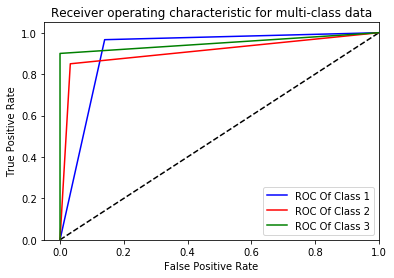

In [14]:
#https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = dict()

    
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:, 0], pos_label=1)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, y_score[:, 2], pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Of Class 1')
plt.plot(fpr[1], tpr[1], color='red', label='ROC Of Class 2')
plt.plot(fpr[2], tpr[2], color='green', label='ROC Of Class 3')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [15]:
print('Area Under Class-1 : %.2f' %  roc_auc[0])

Area Under Class-1 : 0.91


In [16]:
print('Area Under Class-2 : %.2f' %  roc_auc[1])

Area Under Class-2 : 0.91


In [17]:
print('Area Under Class-3 : %.2f' %  roc_auc[2])

Area Under Class-3 : 0.95


### Cost Complexity pruning

#### Classify the dataset using Decision Tree classifier

In [18]:
clf = DecisionTreeClassifier(random_state=1)

fig=clf.fit(X_train, y_train)

predicted= clf.predict(X_test)

#### Visualizing the Decision Tree (DT) 

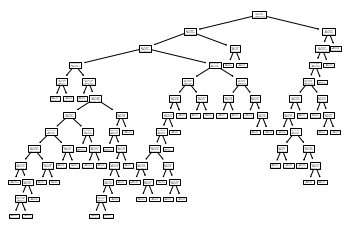

In [19]:
tree.plot_tree(fig)
plt.show()


####  Accuracy Of The Above Tree

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9479166666666666


#### Precision Of The Above Tree 

In [21]:
precision = precision_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Precision: %.17f' % precision)

Precision: 0.92666264818163546


#### Recall Of The Above Tree

In [22]:
recall = recall_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Recall: %.17f' % recall)

Recall: 0.90546218487394958


#### Classification Report

In [23]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.97      0.97      0.97       238
     class 2       0.81      0.85      0.83        40
     class 3       1.00      0.90      0.95        10

    accuracy                           0.95       288
   macro avg       0.93      0.91      0.92       288
weighted avg       0.95      0.95      0.95       288



#### ROC - AUC CURVE

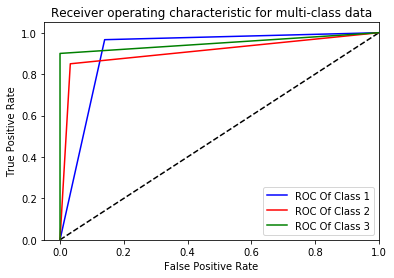

In [24]:
#https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = dict()

    
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:, 0], pos_label=1)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, y_score[:, 2], pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Of Class 1')
plt.plot(fpr[1], tpr[1], color='red', label='ROC Of Class 2')
plt.plot(fpr[2], tpr[2], color='green', label='ROC Of Class 3')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [25]:
print('Area Under Class-1 : %.2f' %  roc_auc[0])

Area Under Class-1 : 0.91


In [26]:
print('Area Under Class-2 : %.2f' %  roc_auc[1])

Area Under Class-2 : 0.91


In [27]:
print('Area Under Class-3 : %.2f' %  roc_auc[2])

Area Under Class-3 : 0.95


#### Using complexity_pruning_path function of Decision Tree Clasifier to get various ccp_alphas values

In [28]:
path= clf.cost_complexity_pruning_path(X_train, y_train)
alphas= path['ccp_alphas']
print(alphas)

[0.         0.00068345 0.00078261 0.00085696 0.00086957 0.00098872
 0.00110006 0.00117391 0.0013913  0.00154589 0.00154602 0.00156522
 0.00162319 0.00169429 0.00208696 0.00208696 0.00225575 0.00234783
 0.00253878 0.00261502 0.00309979 0.00365079 0.00401597 0.00407392
 0.00610113 0.01314102 0.01829856 0.02262185 0.15415682]


#### Creating different Decision Tree clasifiers on different values of ccp_alphas and Claculating Accuracy of Each Decision Tree

In [29]:
accuracy_train, accuracy_test= [],[]
for i in alphas:
    tree= DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train, y_train)
    y_train_pred= tree.predict(X_train)
    y_test_pred= tree.predict(X_test)
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

#### Ploting ccp_alphas VS Accuracy graph to for both Tain Accuracy and Test Accuracy

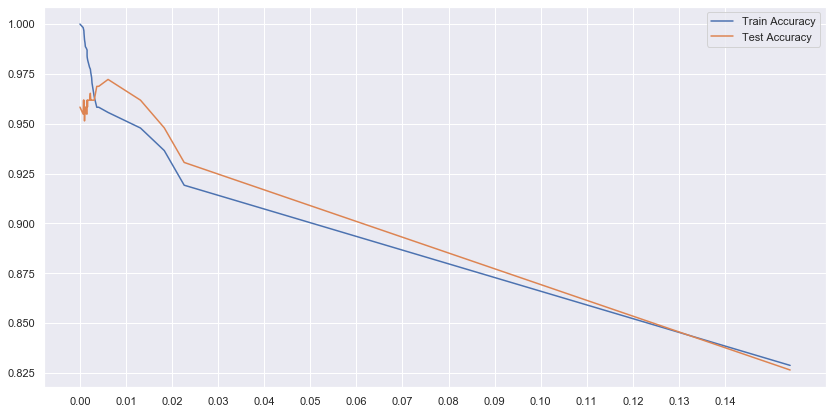

In [30]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train, x= alphas, label= "Train Accuracy")
sns.lineplot(y=accuracy_test, x= alphas, label= "Test Accuracy")
plt.xticks(ticks= np.arange(0.00,0.15,0.01))
plt.show()

#### Taking the optimal value of ccp_alphas from the above graph and building a tree from that optimal ccp_alphas value

In [9]:
clf = DecisionTreeClassifier(ccp_alpha=0.002 ,random_state=1)

fig=clf.fit(X_train, y_train)

predicted= clf.predict(X_test)

#### Visualizing the Prunned Decision Tree (DT)  

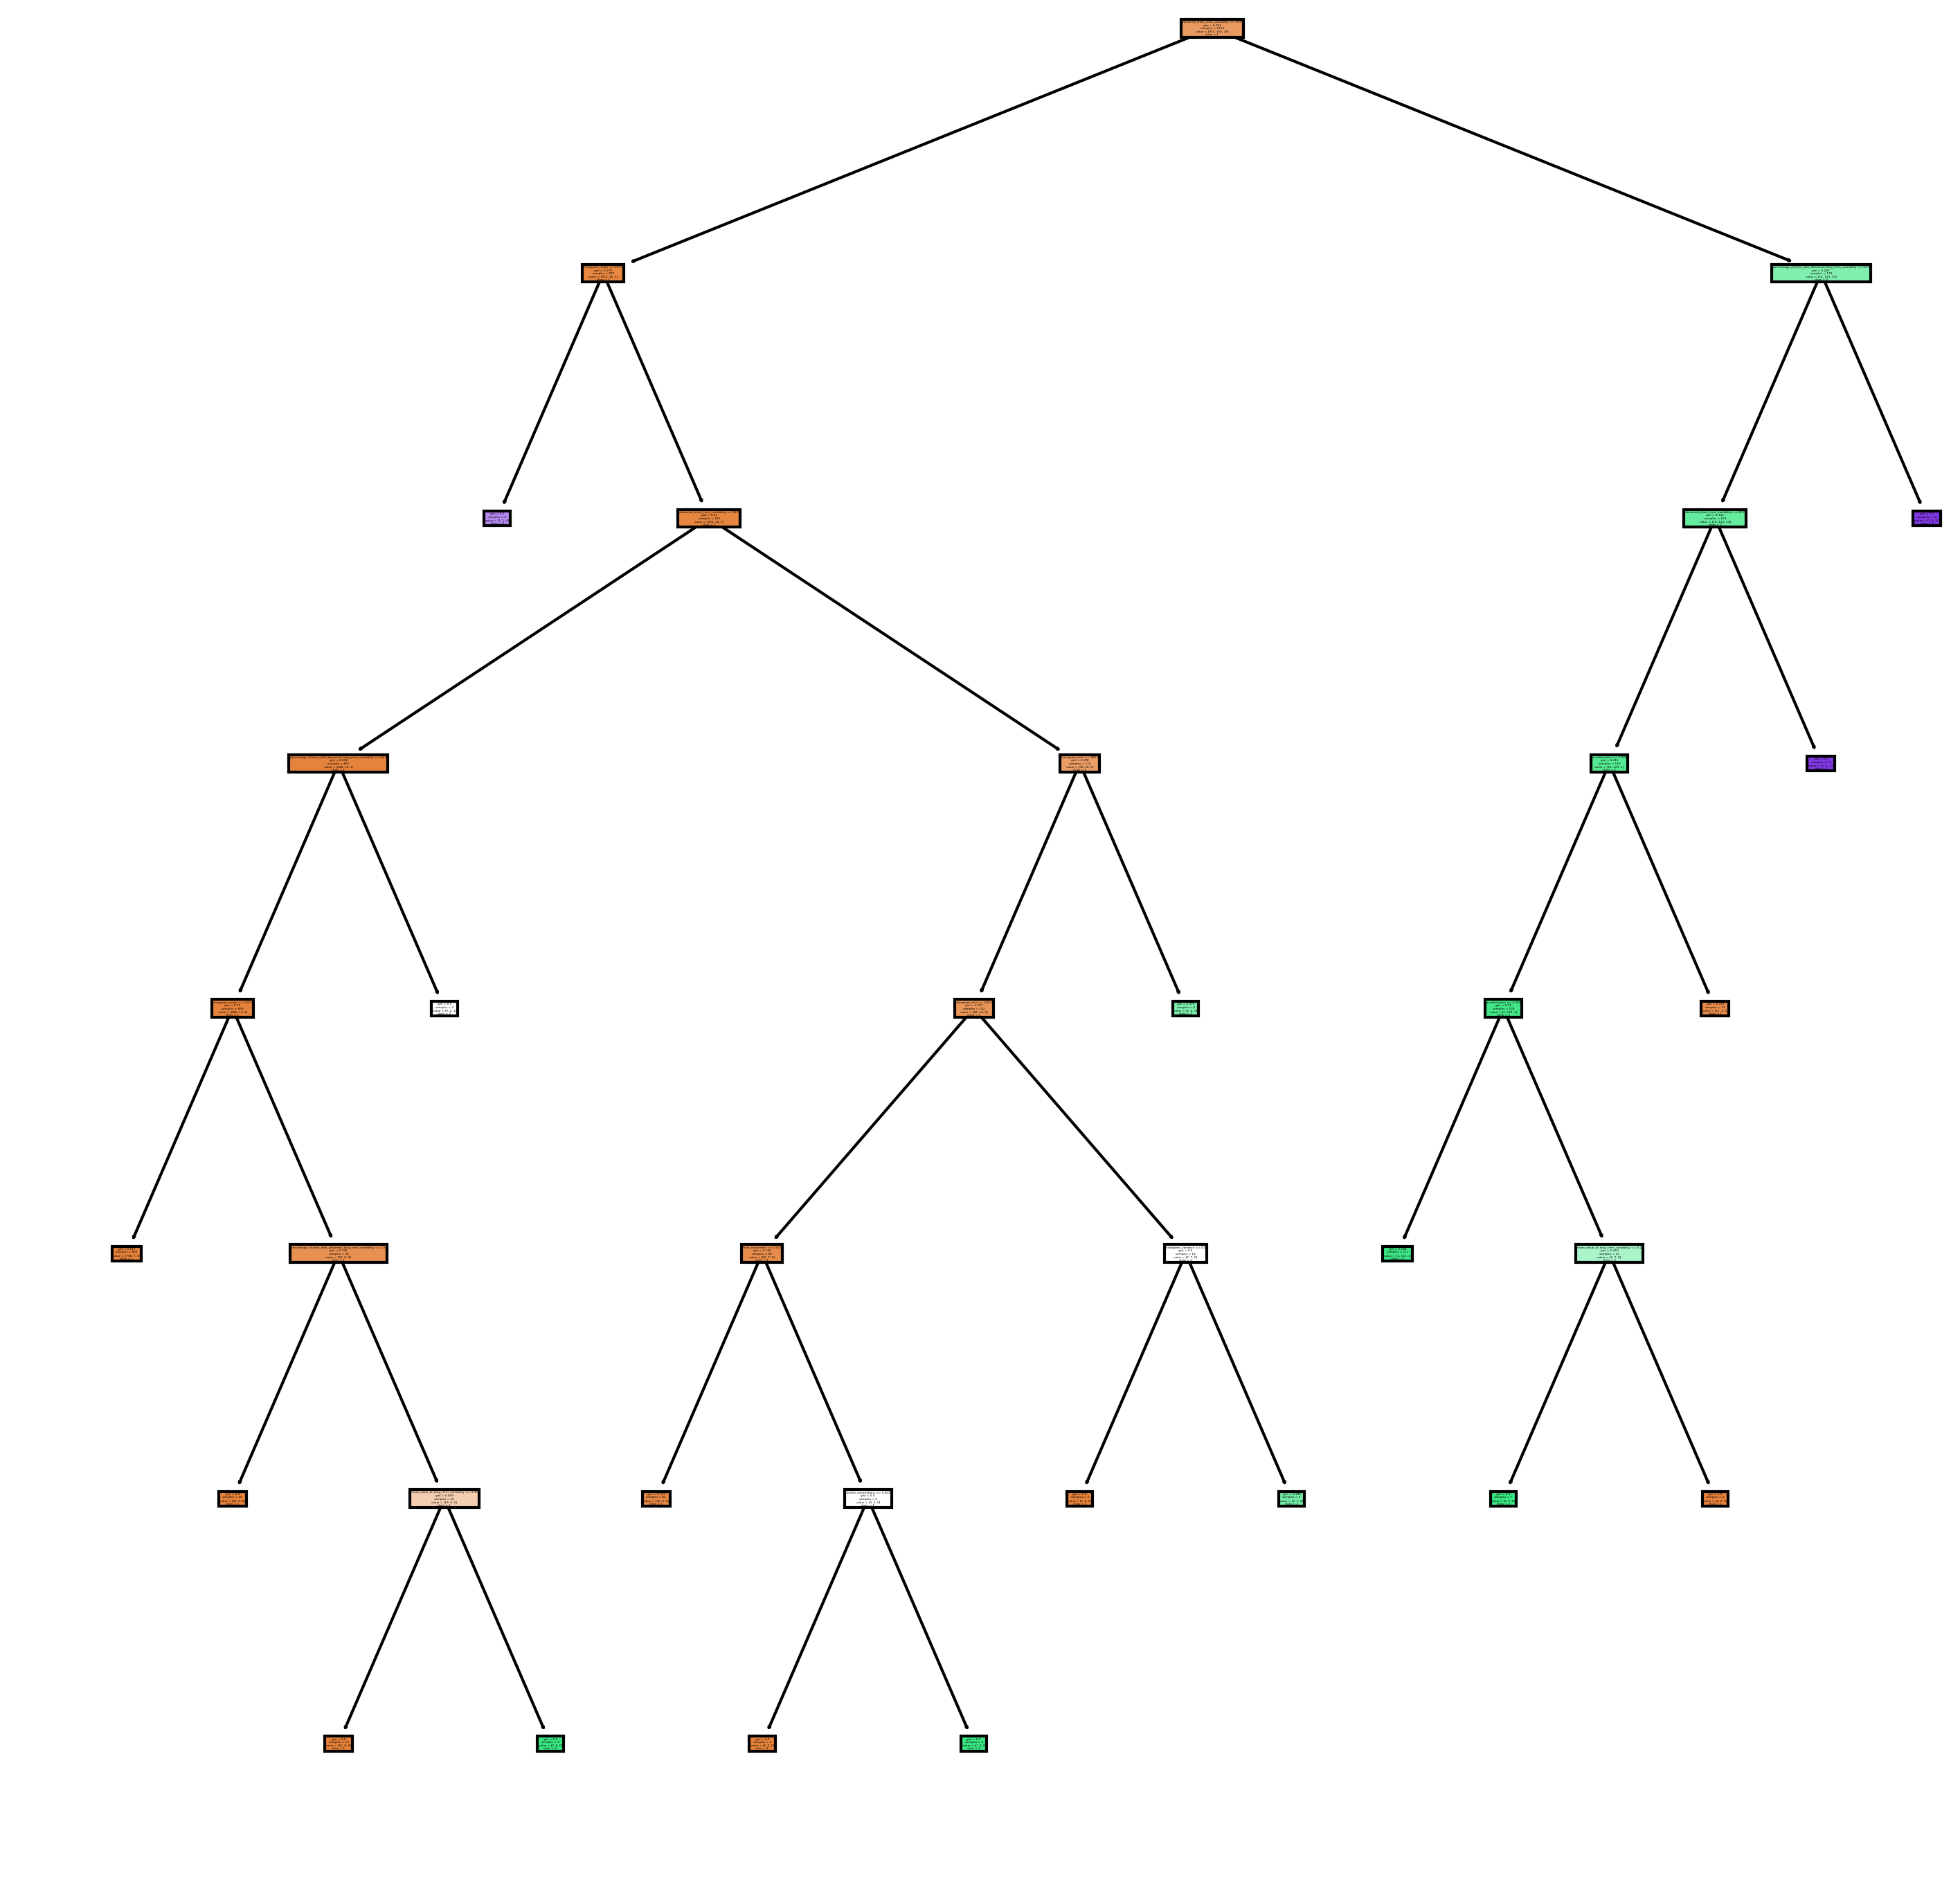

In [10]:
# tree.plot_tree(fig)
# plt.show()

clf.tree_.children_left[2] = TREE_LEAF
#tree.plot_tree(fig)

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,feature_names = X.columns,class_names=np.unique(y).astype('str'),filled = True)
fig.savefig('DT-B-2-CC.png')
plt.show()

import pickle

dbfile = open('DT-B-2-CC', 'ab')
      
    # source, destination
pickle.dump(clf, dbfile)                     
dbfile.close()

#### Accuracy Of The Above Tree

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9444444444444444


#### Precision Of The Above Tree

In [12]:
precision = precision_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Precision: %.17f' % precision)

Precision: 0.92226832641770395


#### Recall Of The Above Tree

In [13]:
recall = recall_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Recall: %.17f' % recall)

Recall: 0.82633053221288522


#### Clasification Report 

In [47]:
target_names = ['class 1', 'class 2', 'class 3']
print(classification_report(y_test, predicted, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.97      0.98      0.98       238
     class 2       0.72      0.85      0.78        40
     class 3       0.00      0.00      0.00        10

    accuracy                           0.93       288
   macro avg       0.56      0.61      0.59       288
weighted avg       0.90      0.93      0.92       288



c:\users\vani sikka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vani sikka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\vani sikka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

#### ROC - AUC CURVE

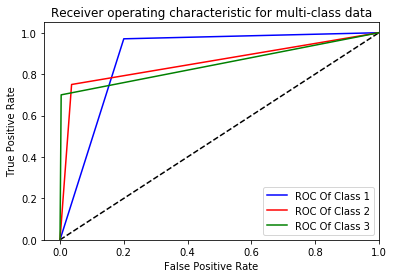

In [23]:
#https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = dict()

    
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:, 0], pos_label=1)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, y_score[:, 2], pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Of Class 1')
plt.plot(fpr[1], tpr[1], color='red', label='ROC Of Class 2')
plt.plot(fpr[2], tpr[2], color='green', label='ROC Of Class 3')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [24]:
print('Area Under Class-1 : %.2f' %  roc_auc[0])

Area Under Class-1 : 0.89


In [25]:
print('Area Under Class-2 : %.2f' %  roc_auc[1])

Area Under Class-2 : 0.86


In [26]:
print('Area Under Class-3 : %.2f' %  roc_auc[2])

Area Under Class-3 : 0.85


### Hyperparameter Trunning

#### Classify the dataset using Decision Tree classifier

In [87]:
clf = DecisionTreeClassifier()

fig=clf.fit(X_train, y_train)

predicted= clf.predict(X_test)

#### Visualizing the Decision Tree (DT) 

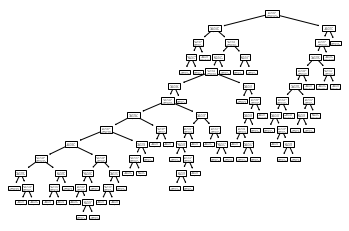

In [88]:
tree.plot_tree(fig)
plt.show()

#### Setting the the various hyperparamenters and all the posible values of each hyperparamenters

In [92]:
param_dist={
    "criterion": ["gini", "entropy"],
    "splitter":["best","random"],
    "max_depth": [1,2,3,4,5,6,7,None],
    "min_samples_leaf": [2,3,4,5,6,7,8,1],
    "min_samples_split": [3,4,5,6,7,8,9,2], 
    "max_features": ["auto", "sqrt", "log2",None],
    "class_weight": ["balanced",None],
    "max_leaf_nodes": [1,2,3,4,5,6,7,None]
}

#### Importing grid search and Making an instance of grid search

In [93]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(clf, param_grid= param_dist, cv=10,n_jobs=-1)

#### Applying Grid Search on the training data

In [94]:
grid.fit(X_train, y_train)

c:\users\vani sikka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
163840 fits failed out of a total of 1310720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
163840 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\vani sikka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\vani sikka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "c:\users\vani sikka\appdata\local\programs\python\py

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 1],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 2],
                         'splitter': ['best', 'random']})

#### Getting the best value of the all the Hyperparameters

In [97]:
grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'splitter': 'best'}

#### Building a pre-prunned tree

In [51]:
clf = DecisionTreeClassifier(class_weight=None,max_depth=6, criterion= 'gini',max_features=None,max_leaf_nodes=None,min_samples_leaf=3,min_samples_split=8, splitter='best'  )

fig=clf.fit(X_train, y_train)

predicted= clf.predict(X_test)

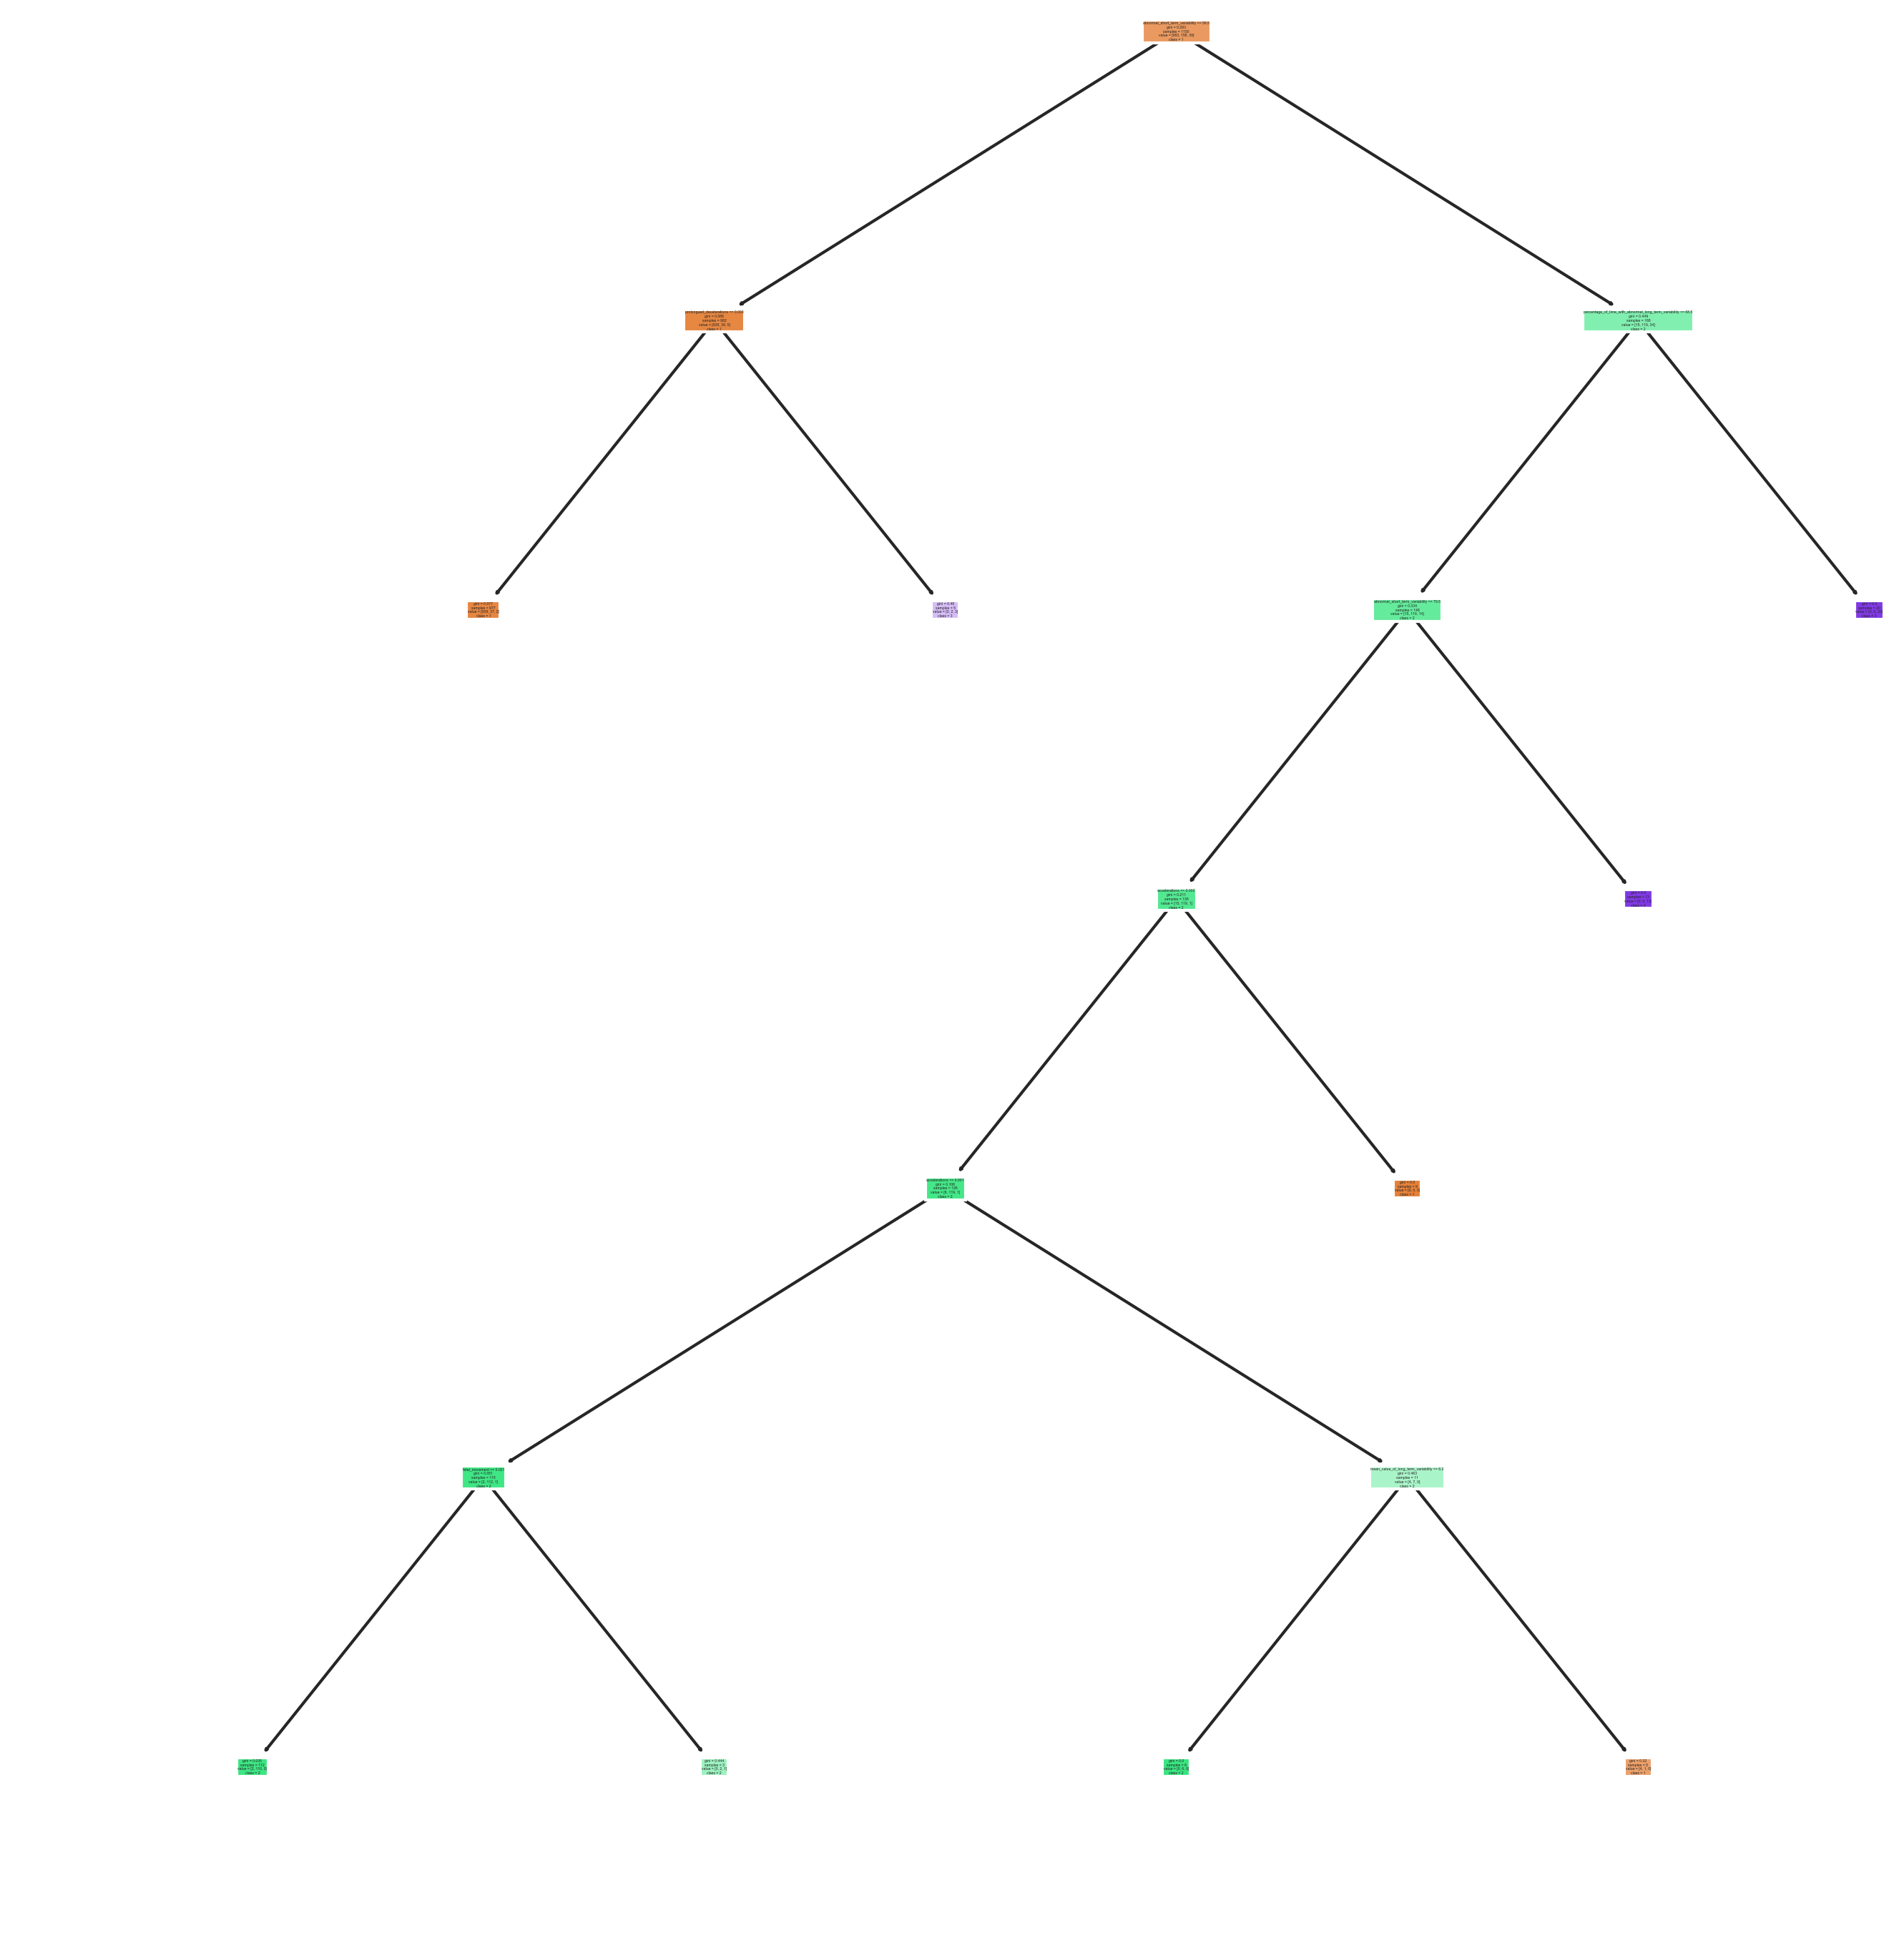

In [52]:
# tree.plot_tree(fig)
# plt.show(fig)

clf.tree_.children_left[2] = TREE_LEAF
#tree.plot_tree(fig)

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,feature_names = X.columns,class_names=np.unique(y).astype('str'),filled = True)
fig.savefig('DT-B-2-XX.png')
plt.show()

import pickle

dbfile = open('DT-B-2-XX', 'ab')
      
    # source, destination
pickle.dump(clf, dbfile)                     
dbfile.close()

#### Accuracy Of The Above Tree

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9652777777777778


#### Precision Of The Above Tree

In [54]:
precision = precision_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Precision: %.17f' % precision)

Precision: 0.93850627486991123


#### Recall Of The Above Tree

In [55]:
recall = recall_score(y_test, predicted, labels=[1,2,3], average='macro')
print('Recall: %.17f' % recall)

Recall: 0.91246498599439774


#### ROC - AUC CURVE

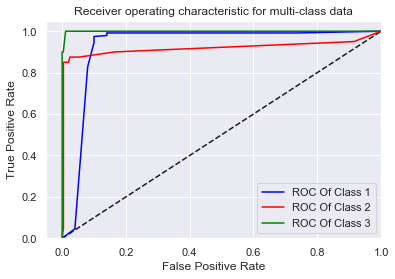

In [56]:
#https://stackoverflow.com/questions/51378105/plot-multi-class-roc-curve-for-decisiontreeclassifier
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
y_score = clf.fit(X_train, y_train).predict_proba(X_test)
fpr = {}
tpr = {}
roc_auc = dict()

    
fpr[0], tpr[0], _ = roc_curve(y_test, y_score[:, 0], pos_label=1)
roc_auc[0] = auc(fpr[0], tpr[0])

fpr[1], tpr[1], _ = roc_curve(y_test, y_score[:, 1], pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

fpr[2], tpr[2], _ = roc_curve(y_test, y_score[:, 2], pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr[0], tpr[0], color='blue', label='ROC Of Class 1')
plt.plot(fpr[1], tpr[1], color='red', label='ROC Of Class 2')
plt.plot(fpr[2], tpr[2], color='green', label='ROC Of Class 3')


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [57]:
print('Area Under Class-1 : %.2f' %  roc_auc[0])

Area Under Class-1 : 0.93


In [58]:
print('Area Under Class-2 : %.2f' %  roc_auc[1])

Area Under Class-2 : 0.92


In [59]:
print('Area Under Class-3 : %.2f' %  roc_auc[2])

Area Under Class-3 : 1.00
